<a href="https://colab.research.google.com/github/vaishnavisharma6/Tensorflow-Practice/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

Given function values
$$
\{ y_i = f(x_i), i=0,1,\ldots, N-1 \}, \qquad f(x) = 2 + \sin(8 \pi x), \quad x \in [0,1]
$$
we want to find a network that gives an approximation of $f(x)$.

Assume some value of $N$, say $N=2000$ and randomly sample $x_i \in [0,1]$ and evaluate $y_i = f(x_i)$.

In [98]:
import os
from IPython.display import clear_output
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense                               # important modules
import numpy as np
import random
import matplotlib.pyplot as plt


In [99]:
N = 2000      
Ntrain = 800                                                           
Nvalid = 800                                                       
x = np.random.rand(N,1)                           
y = np.sin(8 * np.pi * x) + 2                              

In [100]:
train_x = x[0:Ntrain,:]
train_y = y[0:Ntrain,:]
valid_x = x[Ntrain:Ntrain+Nvalid,:]                                   
valid_y = y[Ntrain:Ntrain+Nvalid,:]                                  #dividing dataset
test_x = x[Ntrain+Nvalid:-1,:]
test_y = y[Ntrain+Nvalid:-1,:]

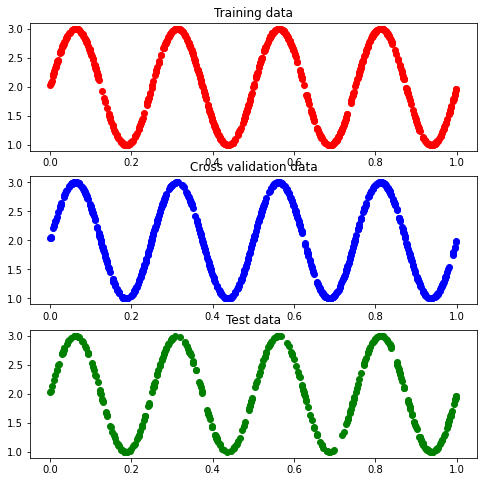

In [101]:
plt.figure(figsize = (8,8))
plt.subplot(3,1,1)
plt.plot(train_x,train_y,'o',color = 'red')
plt.title('Training data')
plt.subplot(3,1,2)
plt.plot(valid_x,valid_y,'o',color = 'blue')
plt.title('Cross validation data')                                   #plots for dataset
plt.subplot(3,1,3)
plt.plot(test_x,test_y,'o',color = 'green')
plt.title('Test data')

plt.show()

In [102]:
class TrainingPlot(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs = {}):
    self.losses = []
    self.val_losses = []
    self.logs = []

  def on_epoch_end(self, epoch, logs = {}):
    self.logs.append(logs)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    if epoch >1 and epoch%500 == 0:                                                             #callback function
      clear_output(wait = True)
      N = np.arange(0, len(self.losses))  

      plt.figure()
      plt.semilogy(N, self.losses, label = 'Train_loss')
      plt.semilogy(N, self.val_losses, label = 'Validation loss')
      plt.title('After epoch = {}'.format(epoch))
      plt.xlabel('Epoch #')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()
    

In [103]:
model = Sequential()
model.add(Dense(512, input_shape = (1,), activation = 'relu'))             # defining architecture of model
model.add(Dense(1))

In [104]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])                    #compiling model

In [105]:
              
model.summary()                       #training model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               1024      
                                                                 
 dense_19 (Dense)            (None, 1)                 513       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


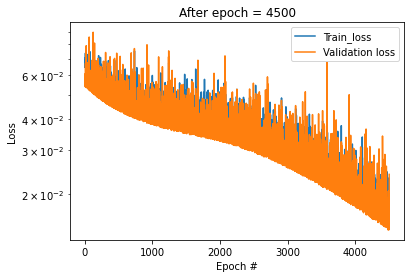

In [107]:
plot_losses = TrainingPlot()
model.fit(train_x, train_y, epochs = 5000, verbose = 0, batch_size = 32, shuffle = True, validation_data = (valid_x, valid_y), callbacks = [plot_losses])

25/25 [==============================] - 0s 2ms/step - loss: 0.0179 - mse: 0.0179
Train accuracy: 0.017902402207255363
25/25 [==============================] - 0s 2ms/step - loss: 0.0157 - mse: 0.0157
Validation accuracy: 0.01566474698483944
13/13 [==============================] - 0s 2ms/step - loss: 0.0232 - mse: 0.0232
Test accuracy: 0.023181812837719917
13/13 [==============================] - 0s 3ms/step


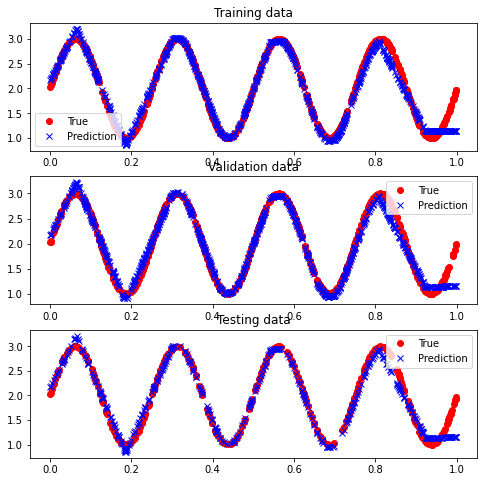

In [108]:
train_loss, train_mse = model.evaluate(train_x, train_y)
print('Train accuracy:', train_mse)

valid_loss, valid_mse = model.evaluate(valid_x, valid_y)
print('Validation accuracy:', valid_mse)

test_loss, test_mse = model.evaluate(test_x, test_y)
print('Test accuracy:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(train_x,train_y,'o',color='red',label='True')
plt.plot(train_x,model.predict(train_x),'x',color='blue',label='Prediction')
plt.title('Training data')
plt.legend()

plt.subplot(3,1,2)
plt.plot(valid_x,valid_y,'o',color='red',label='True')
plt.plot(valid_x,model.predict(valid_x),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(test_x,test_y,'o',color='red',label='True')
plt.plot(test_x,model.predict(test_x),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()